# Perform GSEA using GSEAPY  

Following the potocol defined here: https://gseapy.readthedocs.io/en/latest/gseapy_tutorial.html#use-gsea-command-or-gsea


In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina' # mac
import pandas as pd
import gseapy as gp
import matplotlib.pyplot as plt
import numpy as np

In [2]:
gp.__version__

'0.9.9'

## 1. Prepare expression file
In our case, the expression file is the percentage of cells inside each pseudostate **bin**

In [3]:
gene_exp_alpha = pd.read_csv("./dat/1901/res.genes_level.a.csv",index_col=0)
gene_exp_alpha.head()

,pval,odds,type1_frac,type2_frac,FDR,padj.Bonferroni,FDR.BY
SAMD11,0.000002,0.532730,0.039850,0.072289,0.000013,0.030243,0.000137
NOC2L,0.193454,0.872666,0.040319,0.045934,0.245128,1.000000,1.000000
KLHL17,0.249872,0.827881,0.013127,0.015813,0.299613,1.000000,1.000000
PLEKHN1,0.000105,0.439710,0.013127,0.029367,0.000419,1.000000,0.004283
C1orf170,0.291157,1.227541,0.013830,0.011295,0.338060,1.000000,1.000000


In [4]:
np.log2((gene_exp_alpha[["type1_frac","type2_frac"]]+.00001).head())

,type1_frac,type2_frac
SAMD11,-4.648915,-3.789877
NOC2L,-4.632046,-4.443988
KLHL17,-6.250215,-5.981810
PLEKHN1,-6.250215,-5.089146
C1orf170,-6.174982,-6.466872


In [5]:
(gene_exp_alpha[["type1_frac","type2_frac"]]).head()

,type1_frac,type2_frac
SAMD11,0.039850,0.072289
NOC2L,0.040319,0.045934
KLHL17,0.013127,0.015813
PLEKHN1,0.013127,0.029367
C1orf170,0.013830,0.011295


## 2. Phenotype file (.cls)
- The first line specify the total samples and phenotype numbers. Leave number 1 alway be 1.
- The second line specify the phenotype class(name).
- The third line specify column attributes in setp 1.

In [6]:
with open('./dat/1901/pheno_alpha.cls',"w") as f:
    f.write("2 2 1\n")
    f.write("#A1 A2\n")
    f.write("A1 A2"+"\n")

In [7]:
phenoA, phenoB, class_vector =  gp.parser.gsea_cls_parser("./dat/1901/pheno_alpha.cls")
#class_vector used to indicate group attributes for each sample
print(class_vector)

['A1', 'A2']


In [8]:
print("positively correlated: ", phenoA)

positively correlated:  A1


In [9]:
print("negtively correlated: ", phenoB)


negtively correlated:  A2


## 3. define gene sets

In our case, we will use the beta gene sets from the three literature. And save to [gmt](http://software.broadinstitute.org/cancer/software/gsea/wiki/index.php/Data_formats#GMT:_Gene_Matrix_Transposed_file_format_.28.2A.gmt.29) format.

It was done in another [notebook](./compare_with_previous_glists.ipynb)

## 4. Run gsea
The result is look like this:

![The result interpetation](https://software.broadinstitute.org/gsea/doc/ug_images/anl-enrichment-geneset-plot-annotated.gif)

see also https://software.broadinstitute.org/gsea/doc/GSEAUserGuideFrame.html

- Normalized Enrichment Score (NES)=$\frac{\textrm{actual ES}}{\textrm{mean ES against all permutations}}$

In [10]:
# run gsea
# enrichr libraries are supported by gsea module. Just provide the name

gs_res = gp.gsea(data=np.log2(gene_exp_alpha[["type1_frac","type2_frac"]]+.0000001), # or data='./P53_resampling_data.txt'
                 gene_sets='./dat/glists/gsea.gmt', # enrichr library names or gmt file
                 cls= class_vector, # cls=class_vector
                 #set permutation_type to phenotype if samples >=15
                 permutation_type='gene_set',
                 permutation_num=1000, # reduce number to speed up test
                 outdir=None,  # do not write output to disk
                 no_plot=True, # Skip plotting
                 method='diff_of_classes',
                 processes=4,
                 min_size=0,
                 seed=12345,
                 max_size=4000,
                 format='png')

In [11]:
#access the dataframe results throught res2d attribute
gs_res.res2d

,es,nes,pval,fdr,geneset_size,matched_size,genes,ledge_genes
Term,,,,,,,,
A1_alpha,0.825375,3.328451,0.000000,0.000000,240,240,RAC2;RNF17;GPR37L1;GALNT15;PGAM2;MS4A8;OASL;HT...,RAC2;RNF17;GPR37L1;GALNT15;PGAM2;MS4A8;OASL;HT...
A2_alpha,-0.598539,-3.138262,0.000000,0.000000,3526,3524,BOC;FHOD3;FFAR4;TMEM130;CORO2B;PXN;SLC35D3;ABL...,KIF13B;POLR2I;ZNF184;ILK;MTUS1;MTHFD1L;ZBTB44;...
B1_beta,0.755256,2.378875,0.000000,0.000000,75,75,MS4A8;PDE6C;IGFBP1;FREM3;G6PC2;GRIK1;BST1;SLC2...,MS4A8;PDE6C;IGFBP1;FREM3;G6PC2;GRIK1;BST1;SLC2...
B2_beta,-0.539474,-2.423137,0.000000,0.000000,420,420,PLA2G6;ADCYAP1;TTF2;COX20;SLC7A11;C5orf24;TRMT...,PFN4;RAB3GAP1;DGCR8;SCEL;ABCD3;PHTF1;SPRED1;AL...
Beta sub4_xin,-0.382291,-1.704378,0.000000,0.020893,390,386,MMP7;GCG;GDF15;AUP1;HIST1H1C;DNAJC12;LURAP1L;T...,UGDH;FAU;ARF4;EIF6;DDIT4;SRSF11;SRSF7;EIF5;RAB...
immature_bader,-0.314549,-1.450069,0.000000,0.072159,579,563,GPC4;LOXL2;G6PC2;ARHGDIG;SERPINA10;SV2A;NELL1;...,GALK2;TMEM206;CLPP;CDC23;TMEM214;RAB8A;PSMA6;D...
CD9-_dorrell,0.421354,1.360977,0.244048,0.315570,57,55,IGSF1;CCDC81;LRRTM4;NAV3;ADAMTS5;NPY;SEMA6A;GR...,IGSF1;CCDC81;LRRTM4;NAV3;ADAMTS5;NPY;SEMA6A;GR...
CD9+_dorrell,-0.288973,-0.939788,0.573551,0.684317,45,41,RBP4;KCNA5;PPP1R1A;AK5;ZFP36;PRDM1;NPC1L1;MIA2...,SERPINE2;PGM2L1;BMP2;TMED6;TTC9;PMEPA1;SYNM;CR...
Beta sub3_xin,-0.420538,-0.962803,0.524096,0.753084,13,9,CHGA;ASB9;IGFBP7;CPE;INS;TIMP1;LAMP1;CHGB;CKB,LAMP1;CHGB;CKB


### show the results 
The **gsea** module will generate heatmap for genes in each gene sets in the backgroud.
But if you need to do it yourself, use the code below

In [14]:
from gseapy.plot import gseaplot, heatmap
terms = gs_res.res2d.index
#for i in range(len(terms)):
#    gseaplot(gs_res.ranking, term=terms[i], **gs_res.results[terms[i]])
for i in range(len(terms)):
    gseaplot(gs_res.ranking, term=terms[i], **gs_res.results[terms[i]],ofname=terms[i]+'_alpha.png')

### 5. use GOTerm

In [53]:
names = gp.get_library_name()
names.head()

AttributeError: 'list' object has no attribute 'head'

In [19]:
# run gsea
# enrichr libraries are supported by gsea module. Just provide the name

gs_res = gp.gsea(data=np.log2(gene_exp_alpha[["type1_frac","type2_frac"]]+.0000001), # or data='./P53_resampling_data.txt'
                 gene_sets='GO_Biological_Process_2018', # enrichr library names or gmt file
                 cls= class_vector, # cls=class_vector
                 #set permutation_type to phenotype if samples >=15
                 permutation_type='gene_set',
                 permutation_num=100, # reduce number to speed up test
                 outdir=None,  # do not write output to disk
                 no_plot=True, # Skip plotting
                 method='diff_of_classes',
                 processes=8,
                 seed=12345,
                 format='png')


In [26]:
gs_res.res2d.head()

,es,nes,pval,fdr,geneset_size,matched_size,genes,ledge_genes
Term,,,,,,,,
axon extension (GO:0048675),0.722739,2.438086,0.0,0.091990,20,18,NLGN3;SEMA3A;PLXNB3;SLIT1;NRP1;SLIT3;CDK5;NELL...,NLGN3
neuropeptide signaling pathway (GO:0007218),0.671036,2.099426,0.0,0.246072,71,49,CYSLTR2;SORCS3;NMUR2;NPPA;OPRK1;PTGDR2;NPY;GAL...,CYSLTR2;SORCS3;NMUR2;NPPA;OPRK1;PTGDR2;NPY;GAL...
regulation of acute inflammatory response (GO:0002673),0.584564,2.128741,0.0,0.247606,122,36,C5;F2;C7;C8B;CR1;OSMR;CPN2;FFAR2;C1R;C6;CFI;C1...,C5;F2;C7;C8B;CR1;OSMR;CPN2;FFAR2;C1R;C6;CFI;C1...
regulation of DNA biosynthetic process (GO:2000278),0.734794,2.306052,0.0,0.248372,22,19,ACVRL1;PDGFRB;DACH1;BMPR2;PARP4;SMG5;PRKD2;RGC...,ACVRL1;PDGFRB
regulation of calcium ion-dependent exocytosis (GO:0017158),0.606364,2.117754,0.0,0.251910,54,45,SYTL5;SYT12;C2CD4C;SYT10;SYTL3;RIMS4;SYTL4;RIM...,SYTL5;SYT12;C2CD4C;SYT10;SYTL3;RIMS4;SYTL4;RIM...


In [49]:
terms = gs_res.res2d.index
gs_res.res2d[terms.str.contains('stress')]

,es,nes,pval,fdr,geneset_size,matched_size,genes,ledge_genes
Term,,,,,,,,
positive regulation of transcription from RNA polymerase II promoter in response to stress (GO:0036003),-0.421225,-1.337586,0.138889,0.491041,30,24,MT3;HSF5;NFE2L2;VEGFA;HSF2;MBTPS2;HIF1A;CHD6;A...,TP53;HSF4;DDIT3;ATF4;CEBPB;ATF3;SESN2;HSF1;KLF2
positive regulation of response to endoplasmic reticulum stress (GO:1905898),-0.541900,-1.393757,0.123288,0.495125,16,15,XBP1;BAX;BAK1;PIK3R1;PMAIP1;BCL2L11;ATXN3;USP1...,BOK;DDIT3;ERN1;BAG6;TMEM259;PPP1R15A
stress-activated protein kinase signaling cascade (GO:0031098),-0.369865,-1.288837,0.127273,0.512648,71,66,NRK;MAP3K19;SBK2;STK10;NFKB1;MAP3K1;TAOK3;MAP3...,TNIP2;CUL1;STRADA;MAP3K2;MAP4K3;PAK6;MAP3K5;MA...
intrinsic apoptotic signaling pathway in response to endoplasmic reticulum stress (GO:0070059),-0.456920,-1.285096,0.103896,0.513309,25,22,CASP4;DAB2IP;ITPR1;BAX;BAK1;BCL2;TANK;BRSK2;DN...,DDIT3;ATF4;CEBPB;TNFRSF10B;BAG6;BBC3;PPP1R15A
regulation of cellular response to stress (GO:0080135),-0.376239,-1.457722,0.026316,0.546212,105,99,CRHBP;CAMK2G;CHCHD2;IMPACT;HSPB8;RPA2;NUP37;US...,ARNTL;CCAR2;PINK1;POM121C;MCL1;SIRT1;NUP35;TPR...
negative regulation of response to endoplasmic reticulum stress (GO:1903573),-0.457640,-1.225478,0.139241,0.554379,22,18,LRRK2;XBP1;NCK2;PARK7;DNAJC3;CREB3L1;HERPUD1;S...,DNAJC3;CREB3L1;HERPUD1;SYVN1;PPP1R15B;TXNDC12;...
stress-activated MAPK cascade (GO:0051403),-0.329670,-1.185874,0.210526,0.573018,63,59,ARHGEF6;ZFP36;NOD2;NOD1;NFKB1;MAPK10;MAP3K13;M...,TNIP2;CUL1;MAP4K3;MAP3K5;MAP2K4;MAPK3;TAOK2;MA...
regulation of endoplasmic reticulum stress-induced intrinsic apoptotic signaling pathway (GO:1902235),-0.426985,-1.123532,0.301370,0.622264,20,17,LRRK2;XBP1;EIF2AK3;PMAIP1;PARK7;BCL2L11;CREB3L...,CREB3L1;HERPUD1;SYVN1;TXNDC12;NCK1;CREB3;OPA1;...
negative regulation of stress-activated MAPK cascade (GO:0032873),-0.357498,-1.052207,0.373333,0.673487,31,27,ZNF675;DUSP19;FOXM1;MEN1;TAOK3;MECOM;MYC;QARS;...,HDAC3;FKTN;FOXO1;DLG1;DUSP10;F2RL1;AIDA;PINK1;...


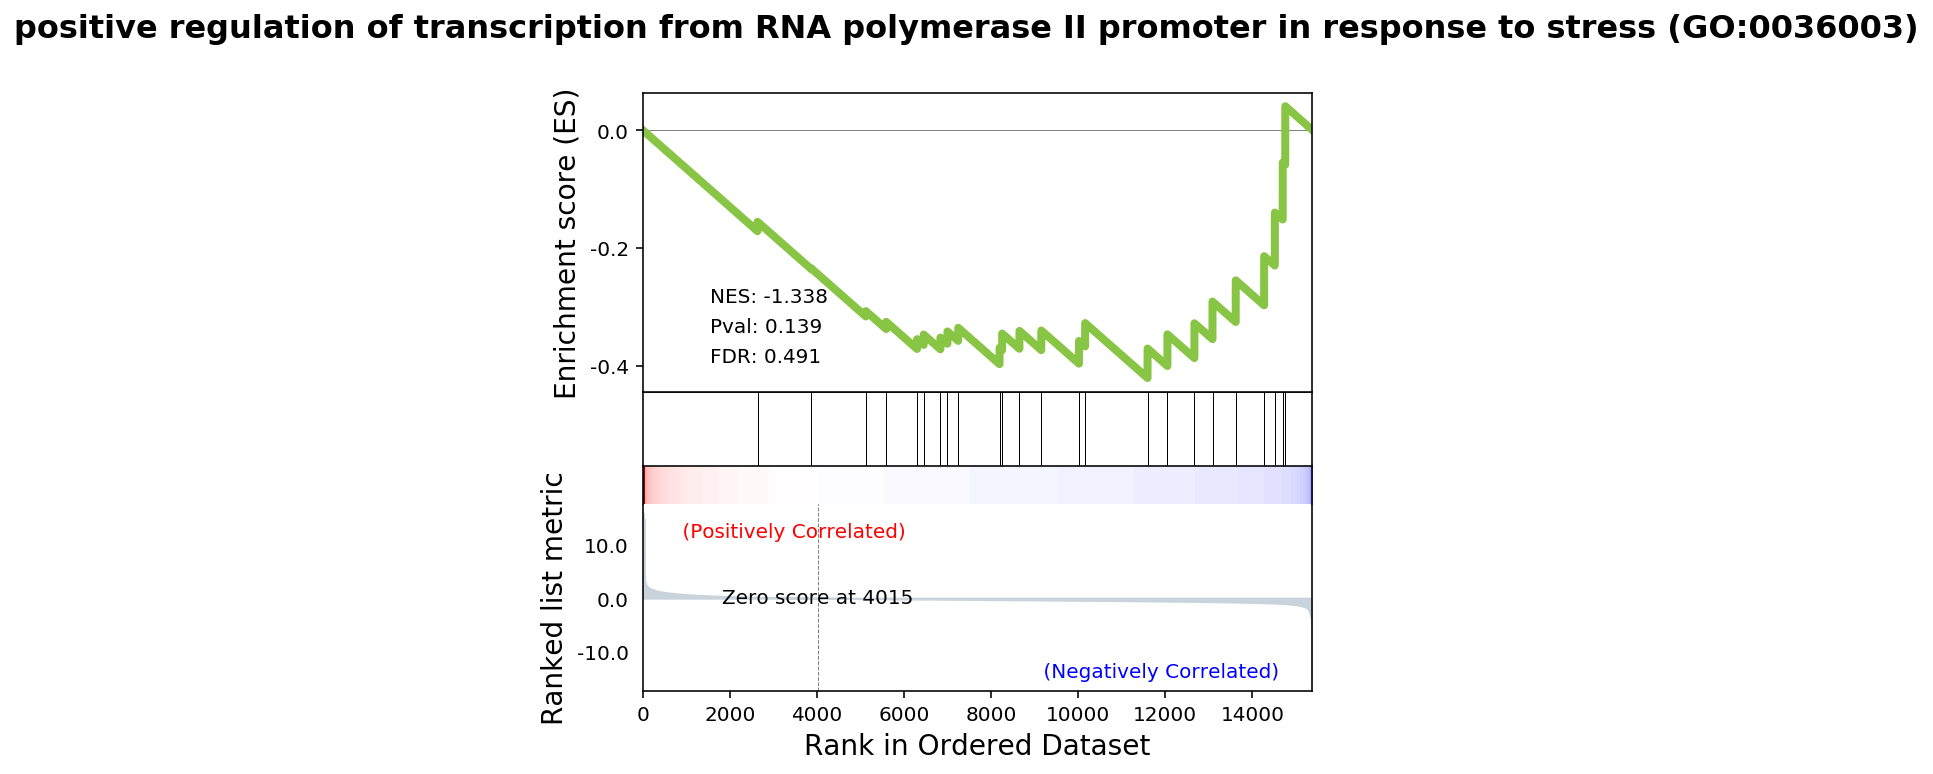

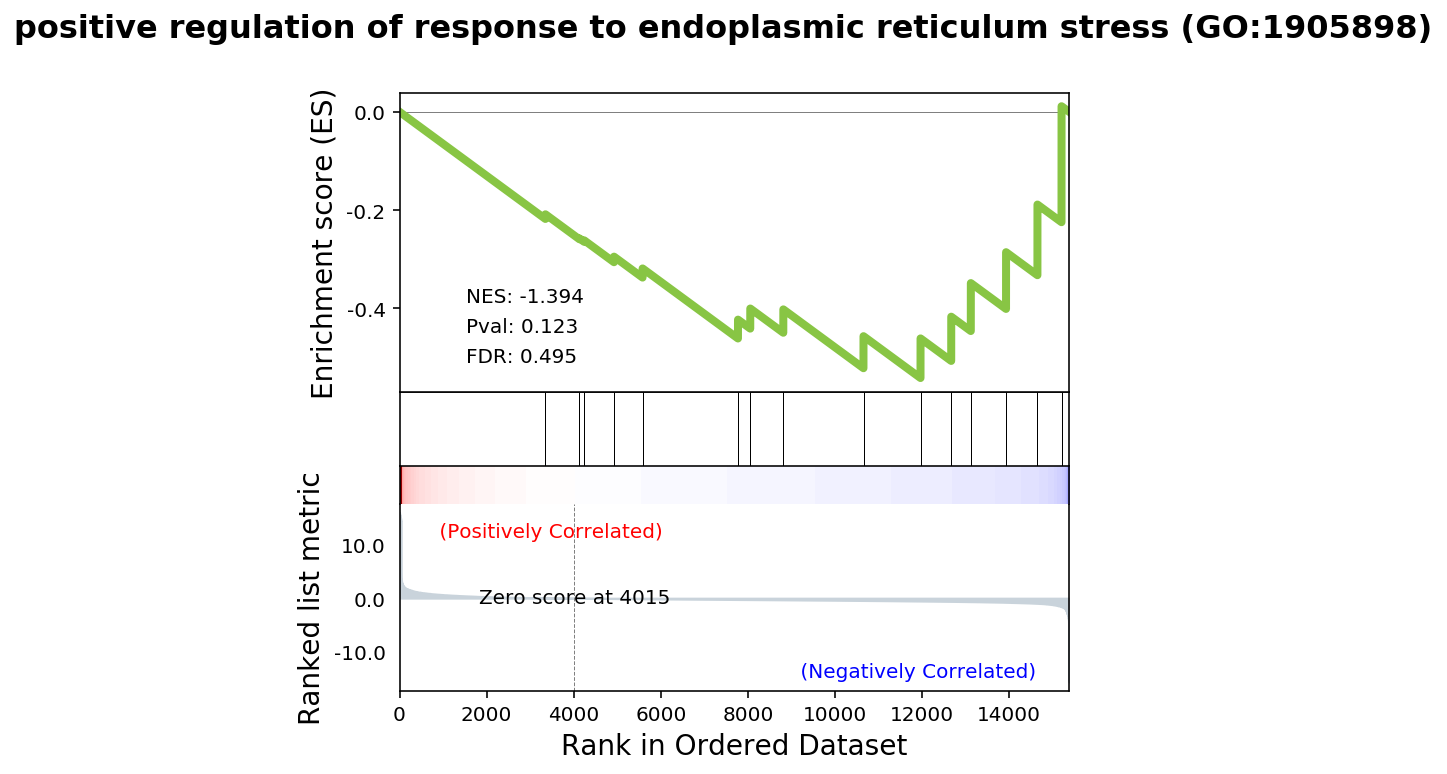

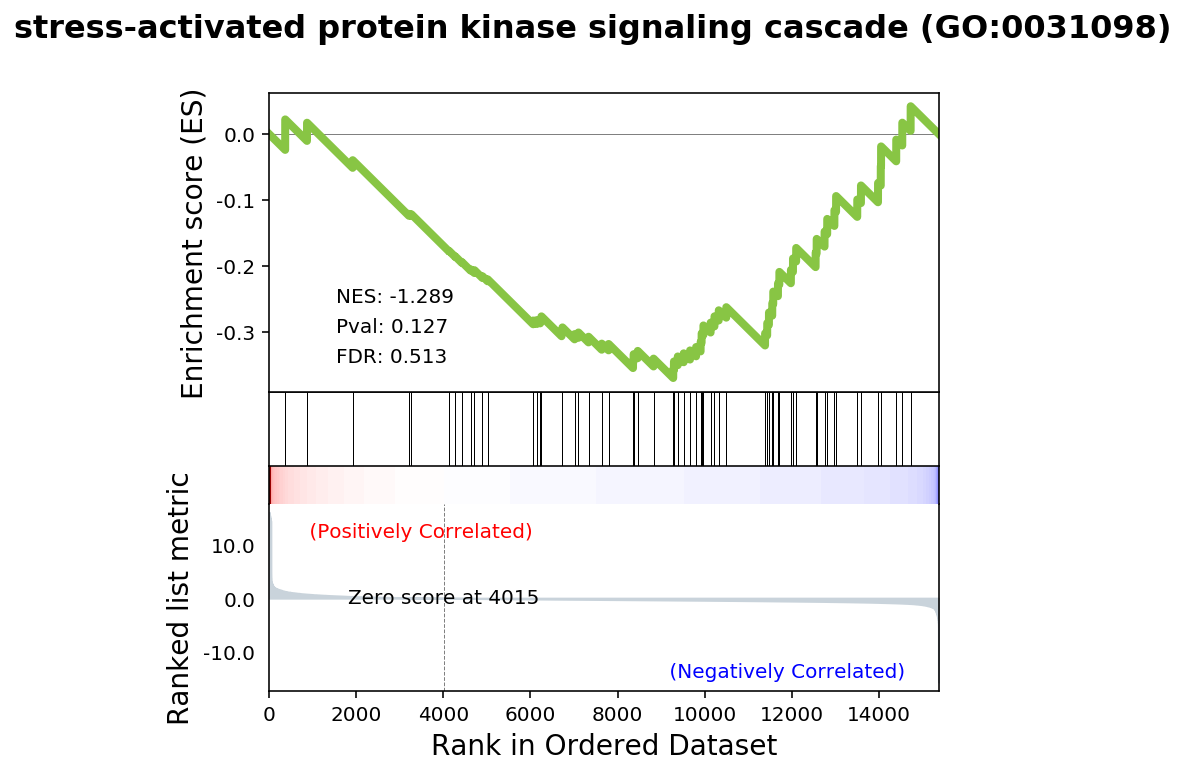

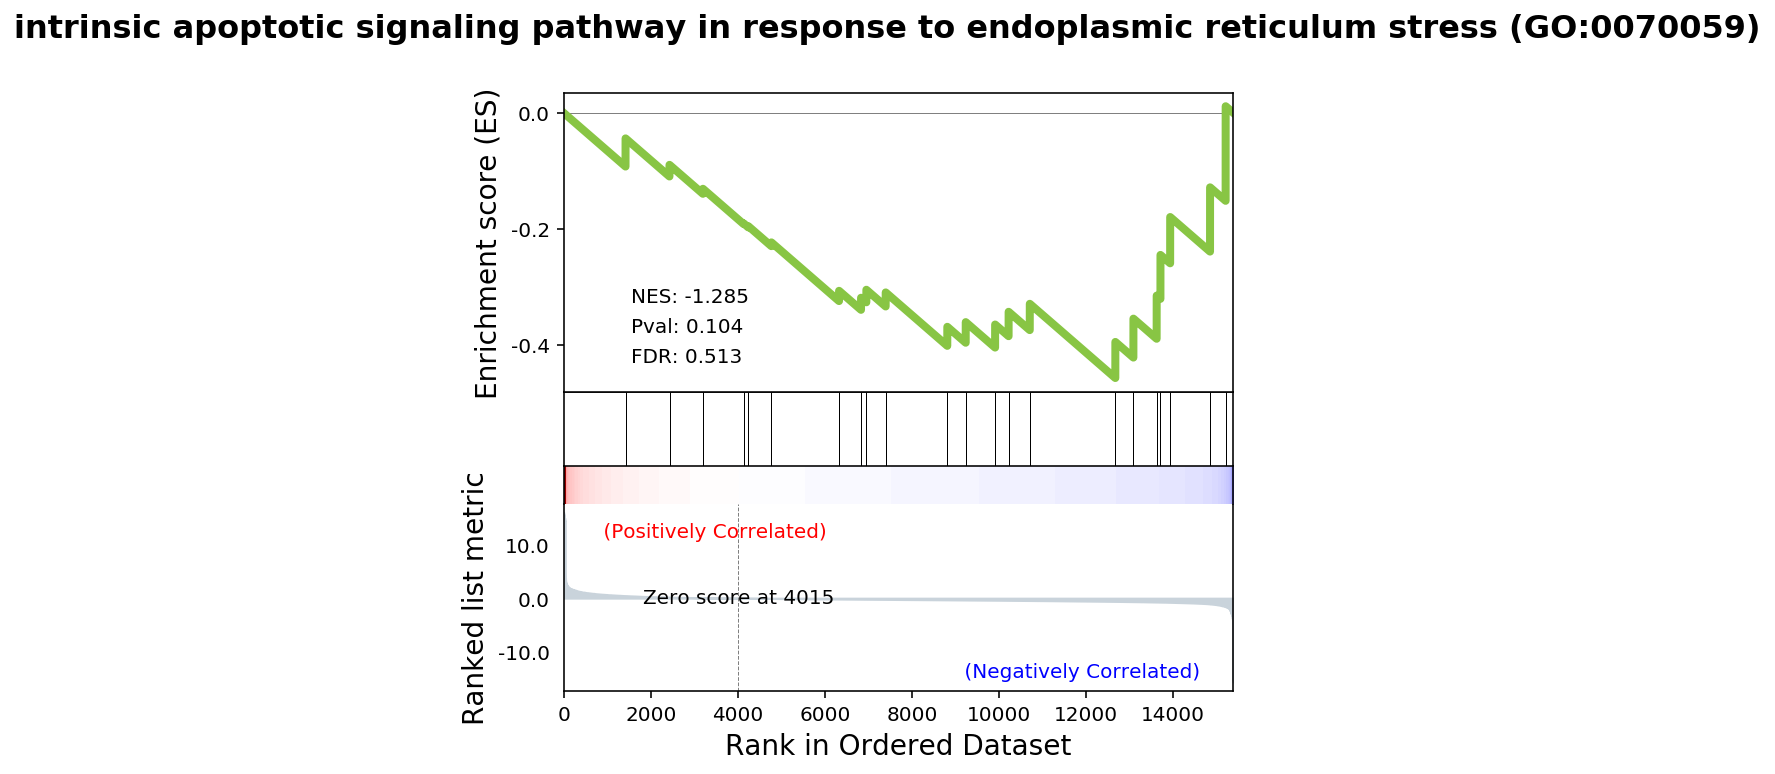

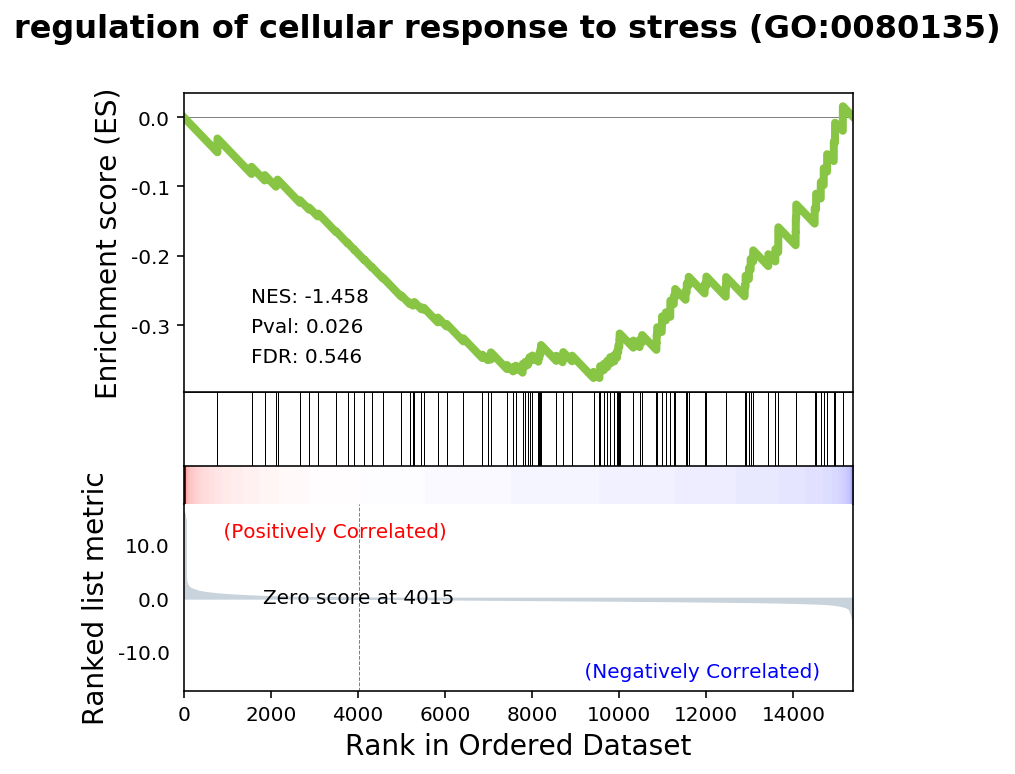

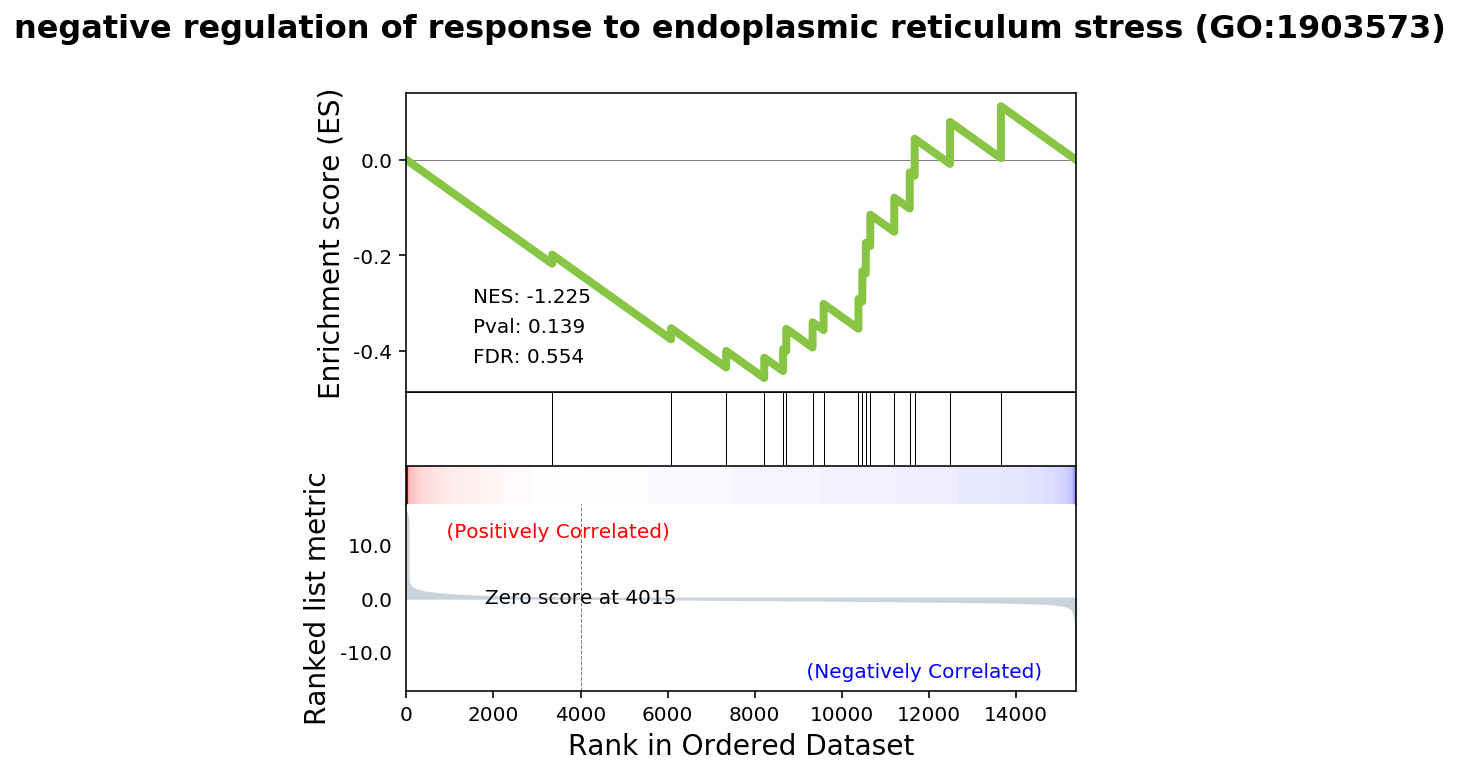

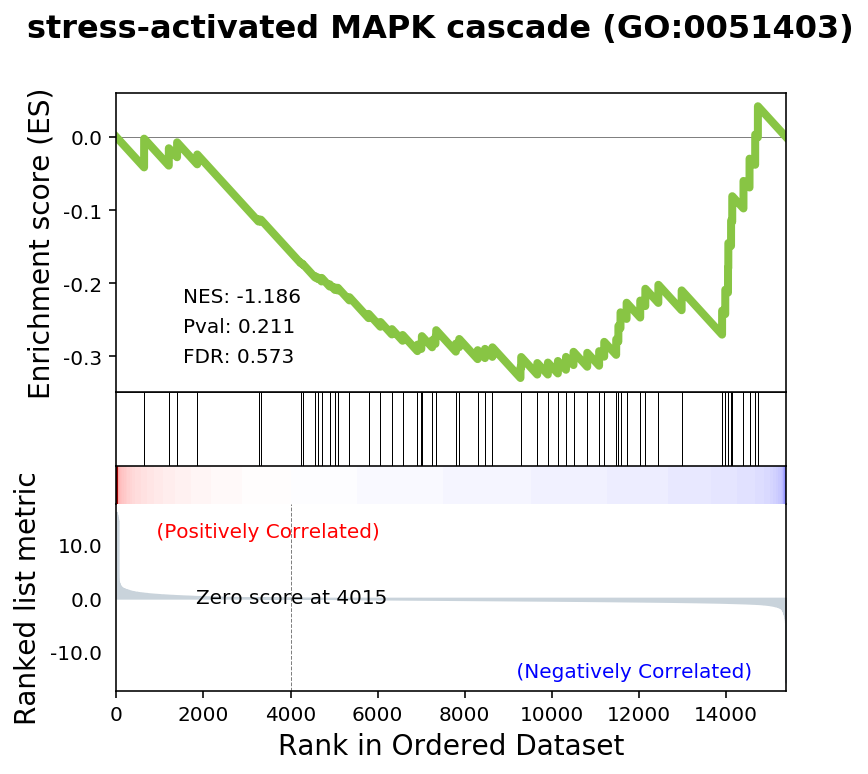

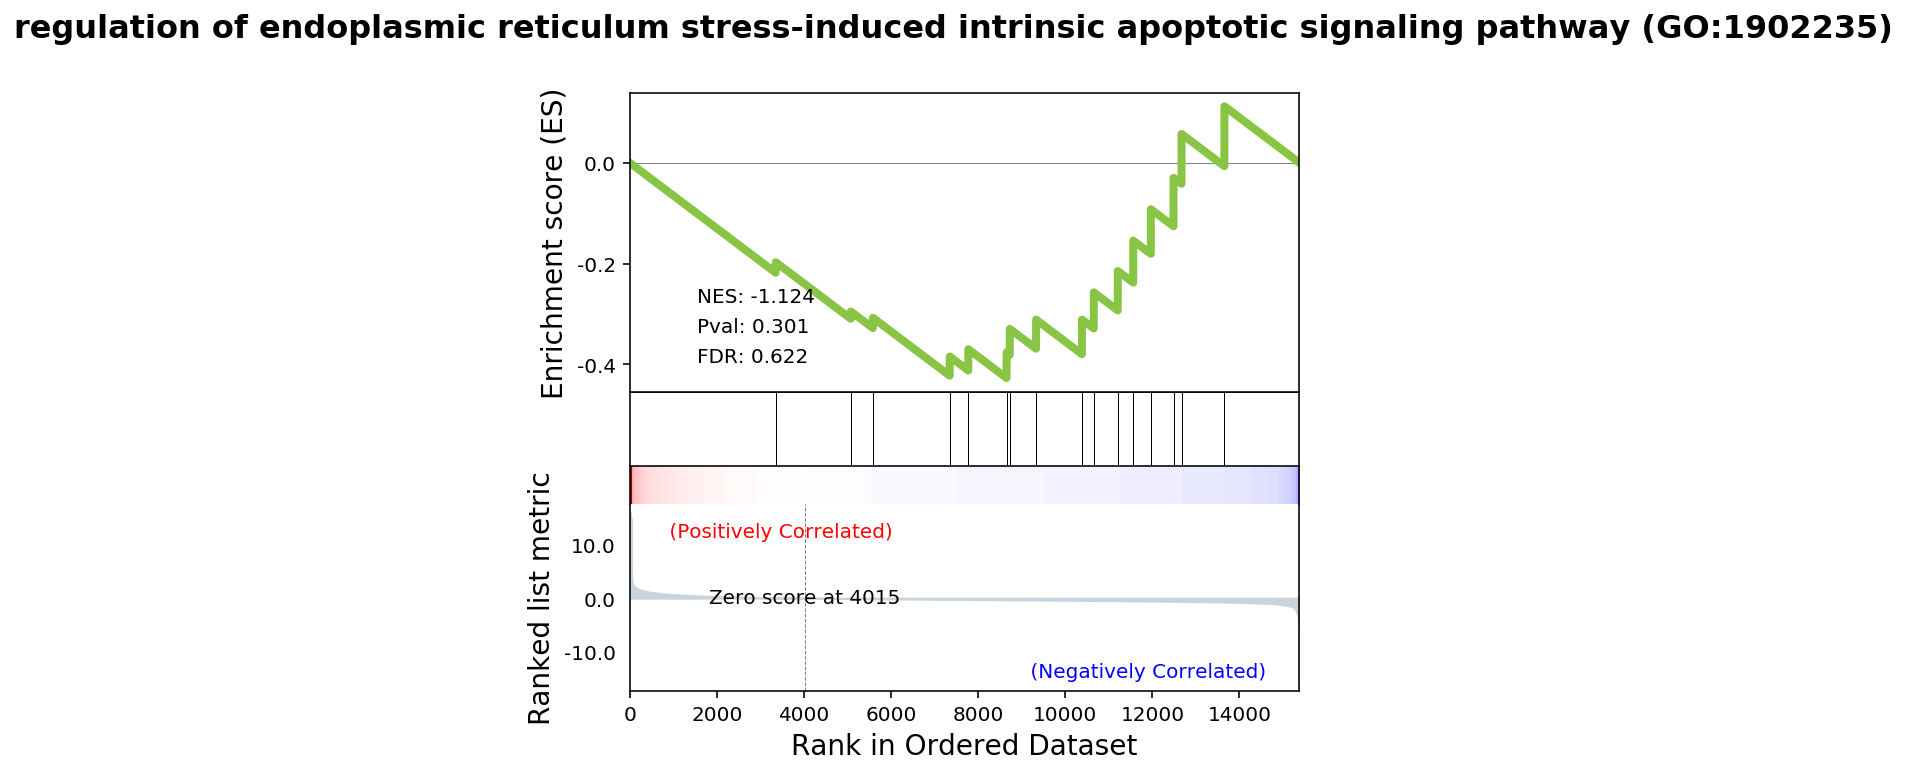

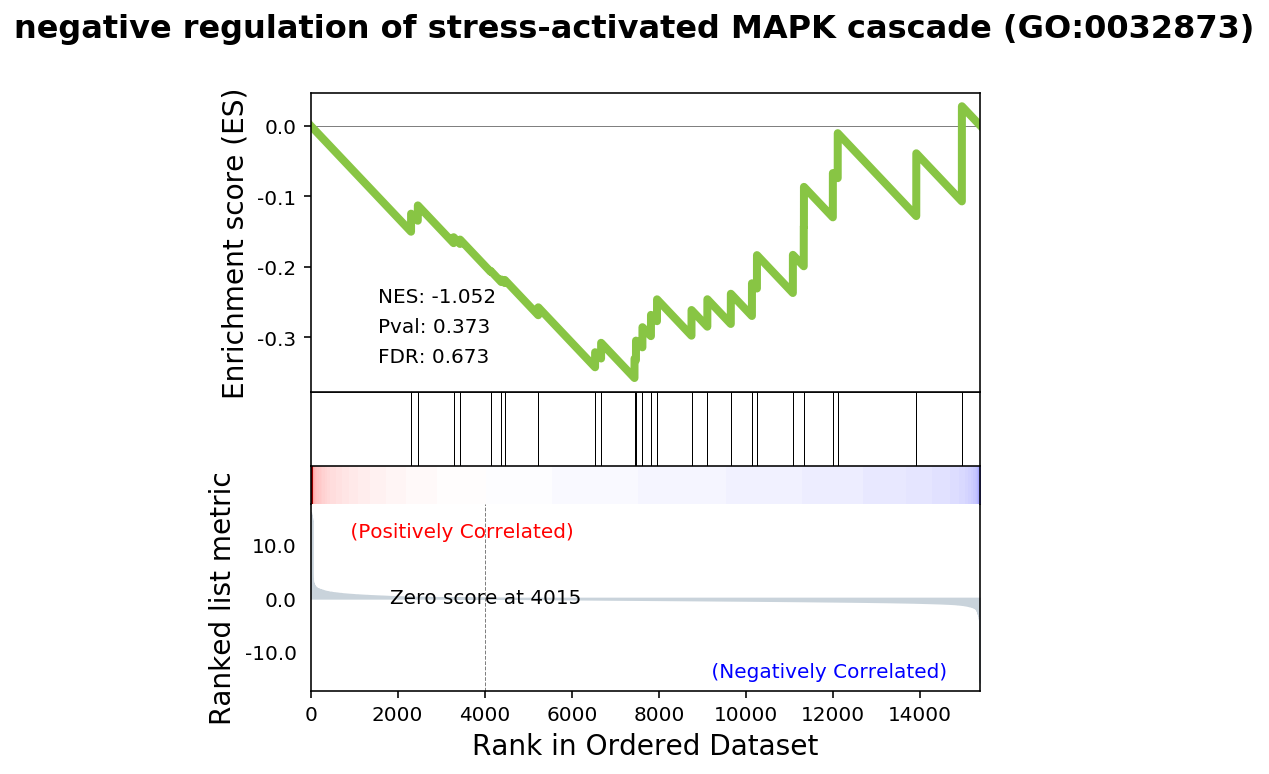

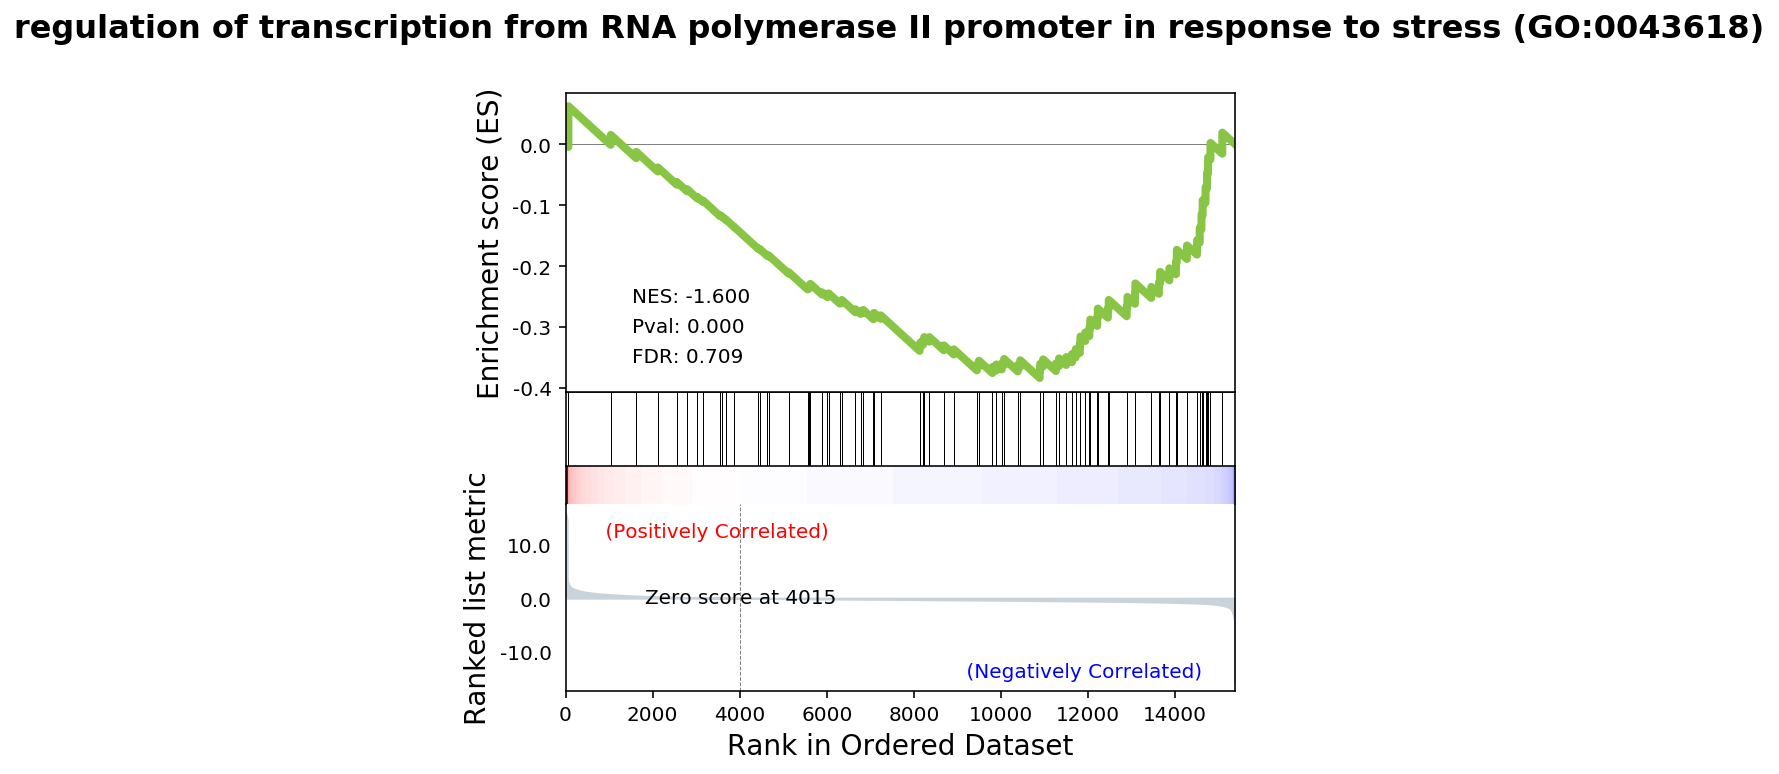

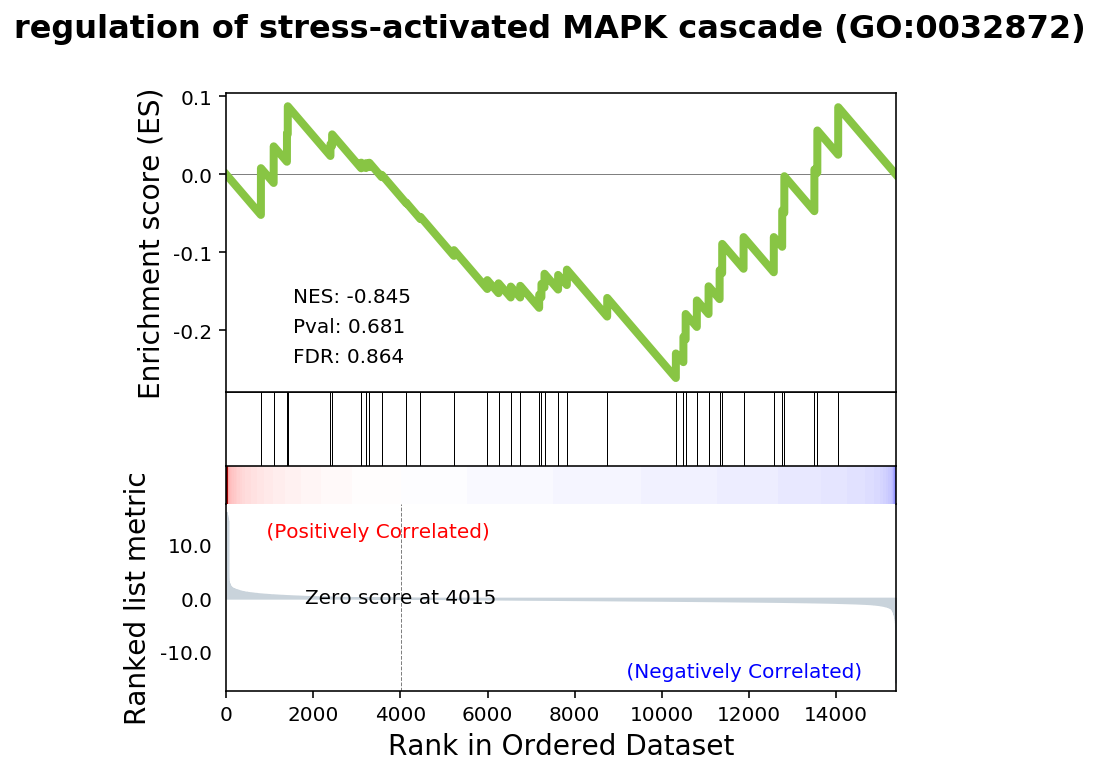

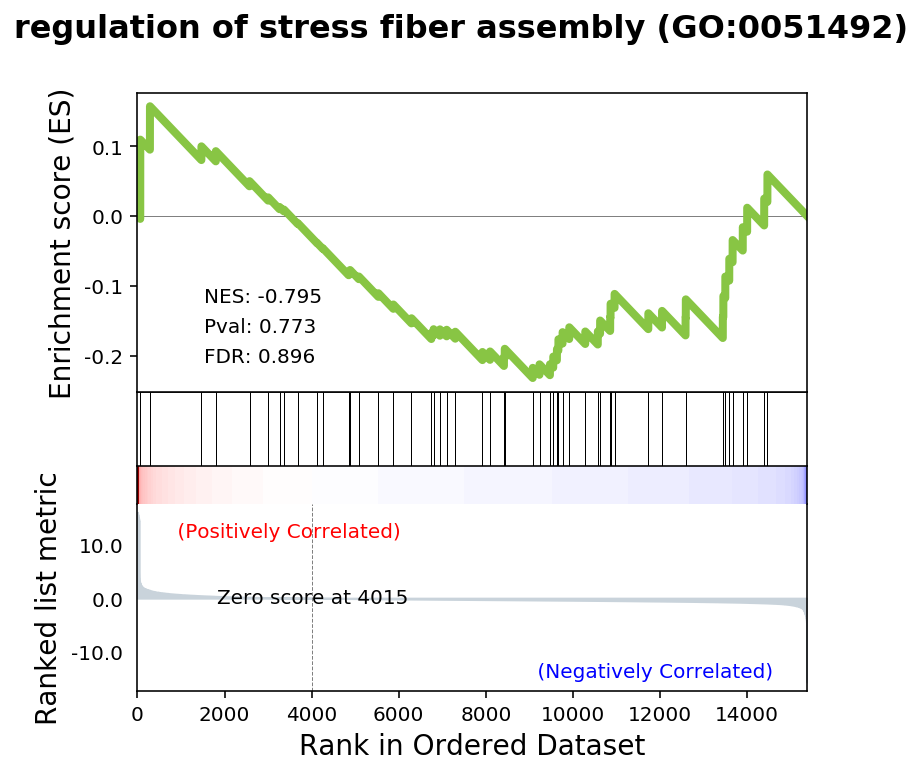

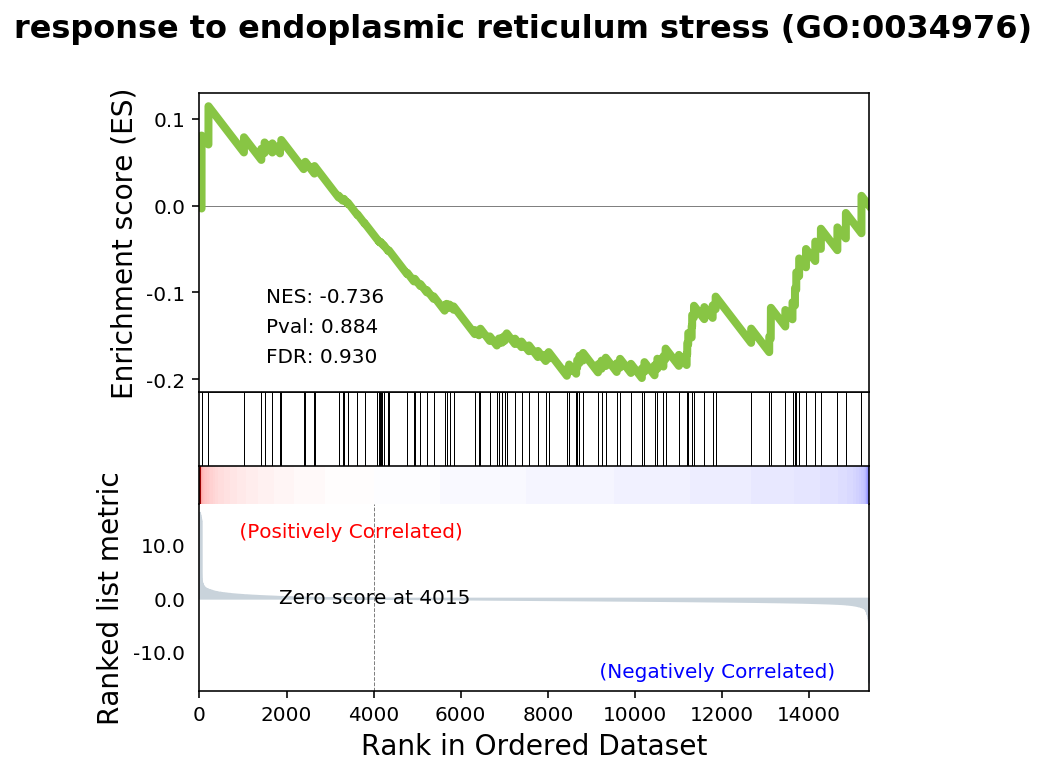

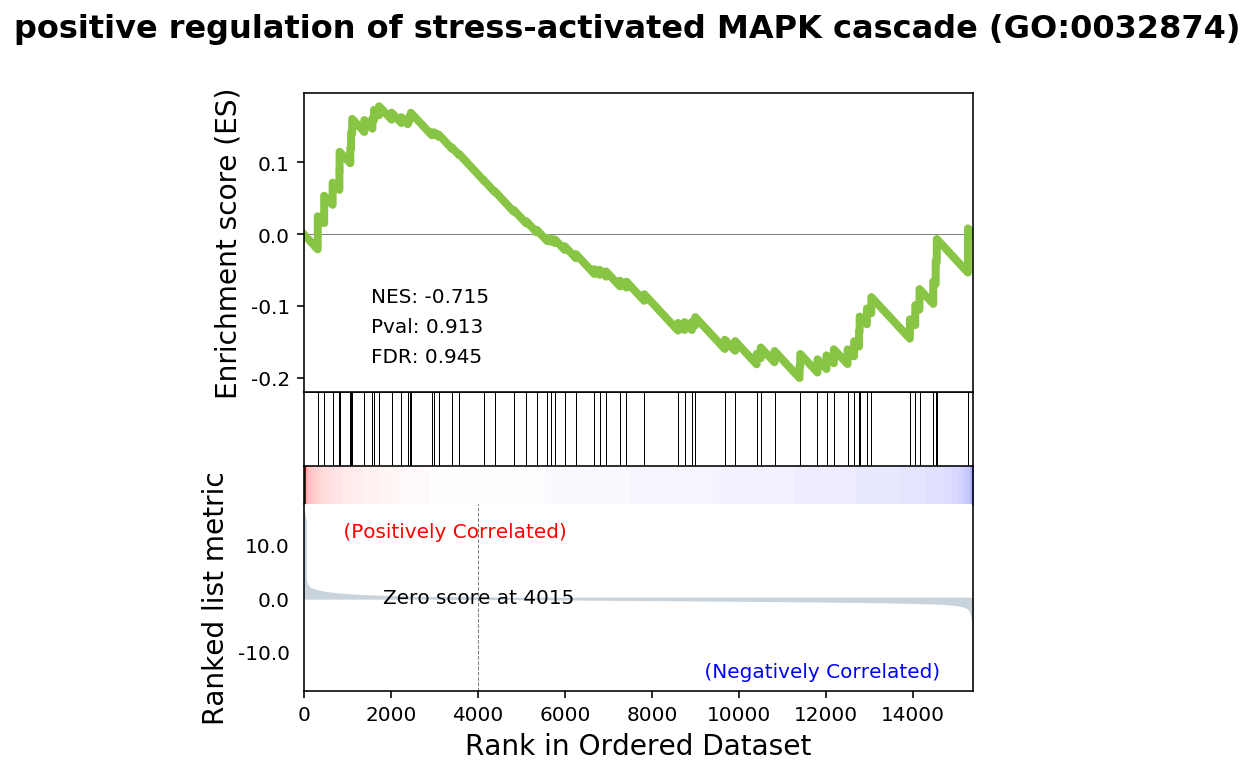

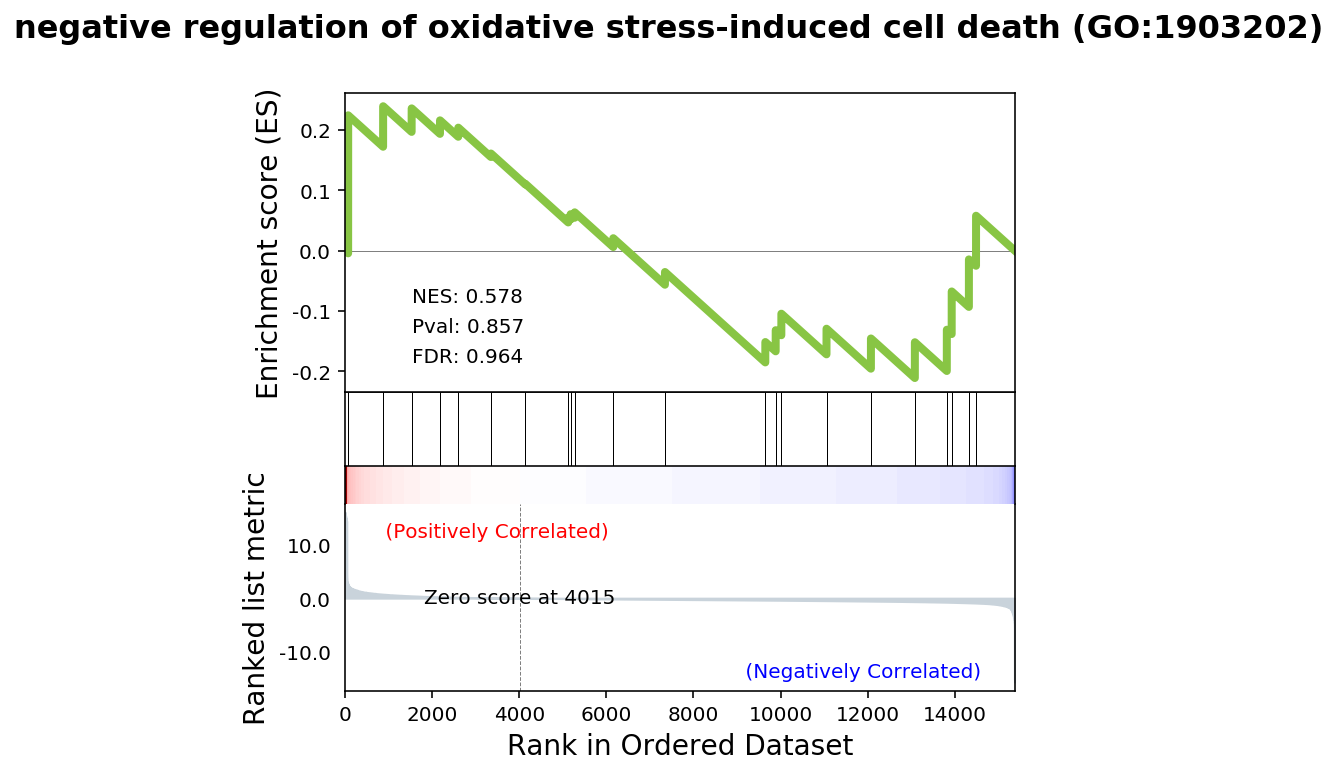

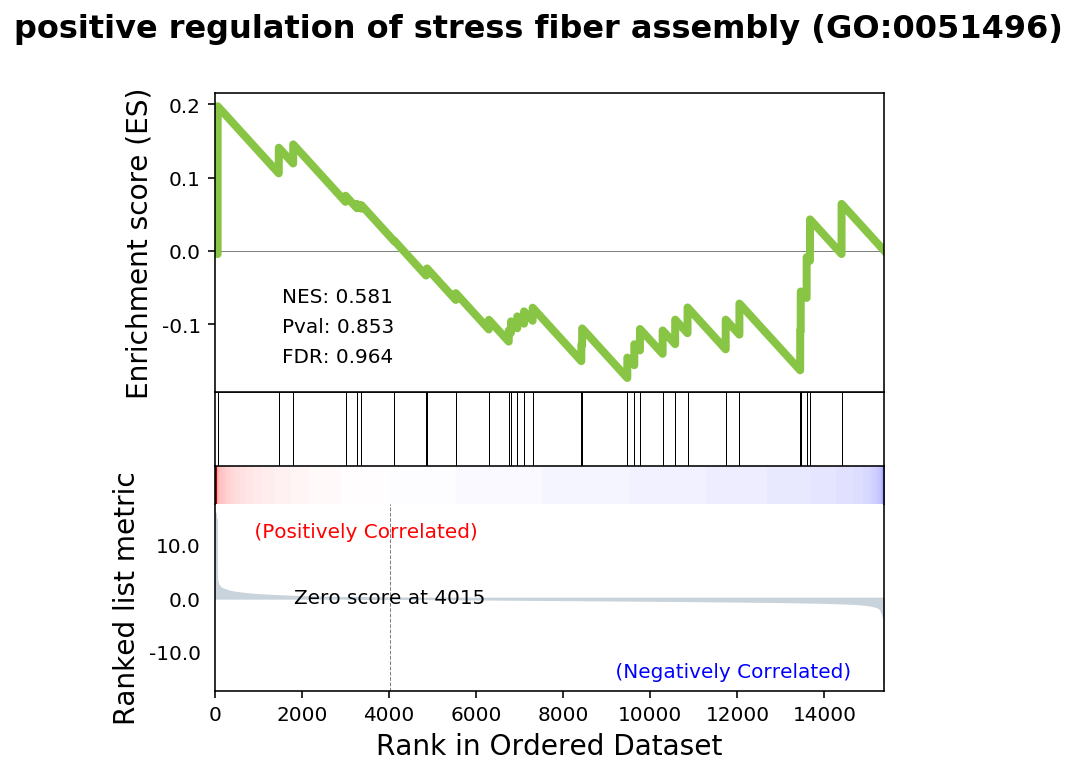

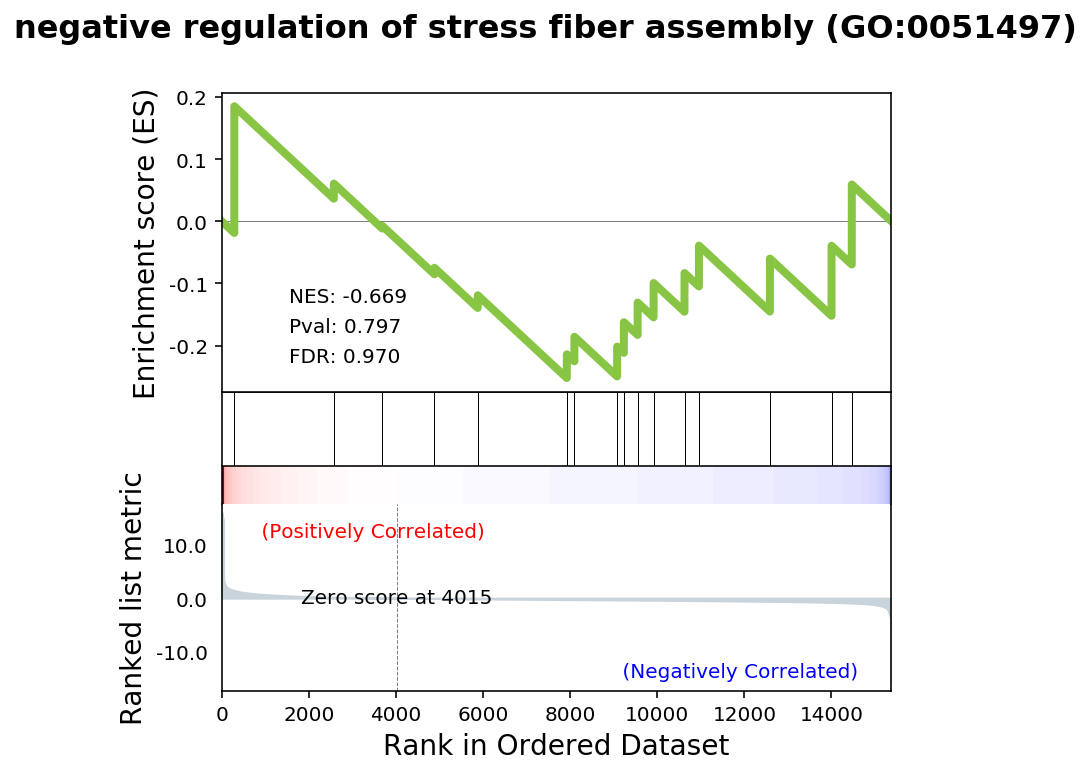

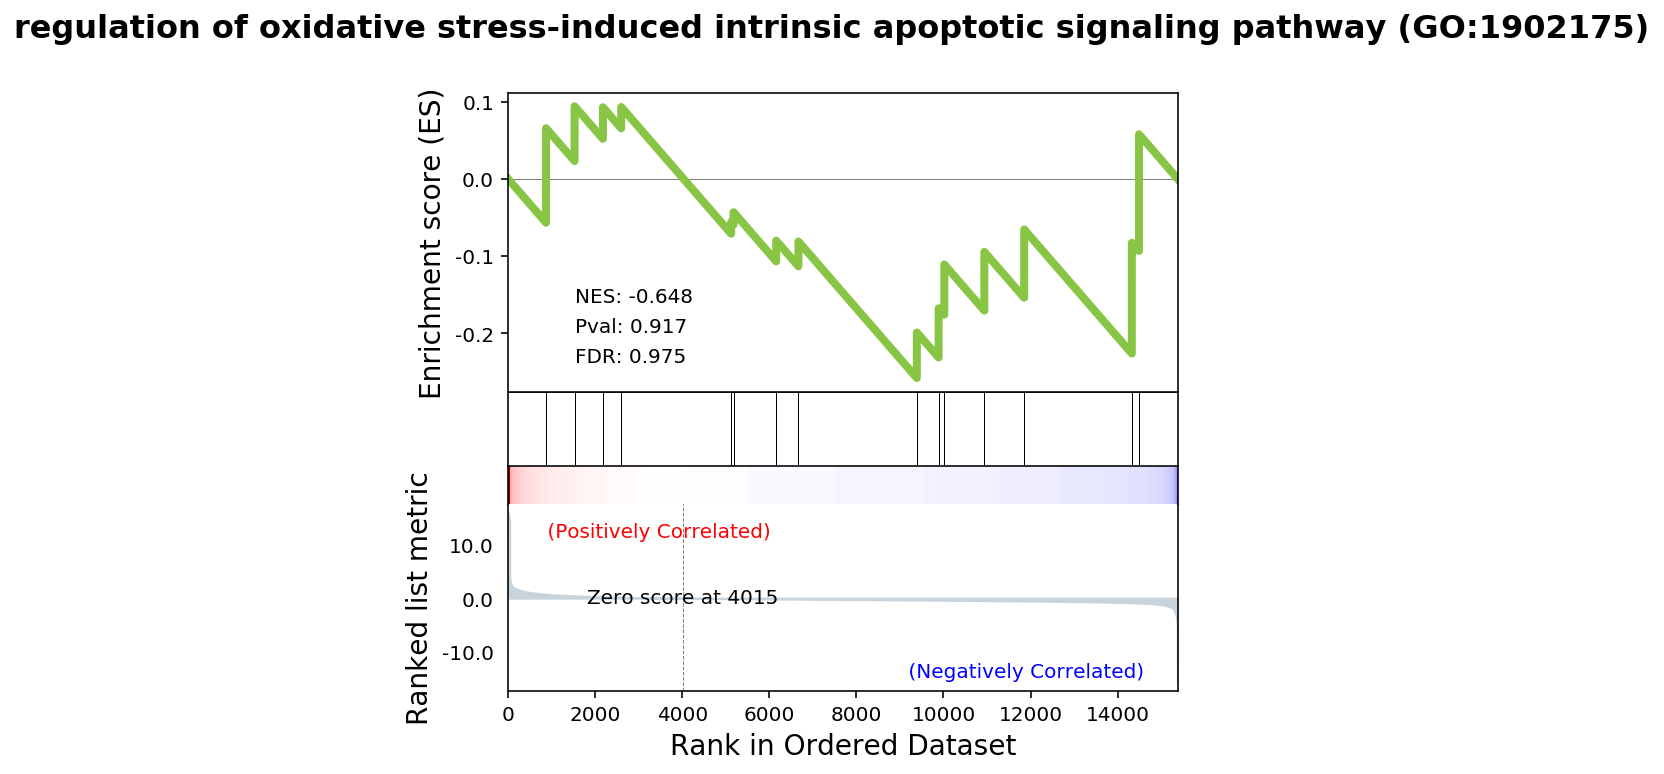

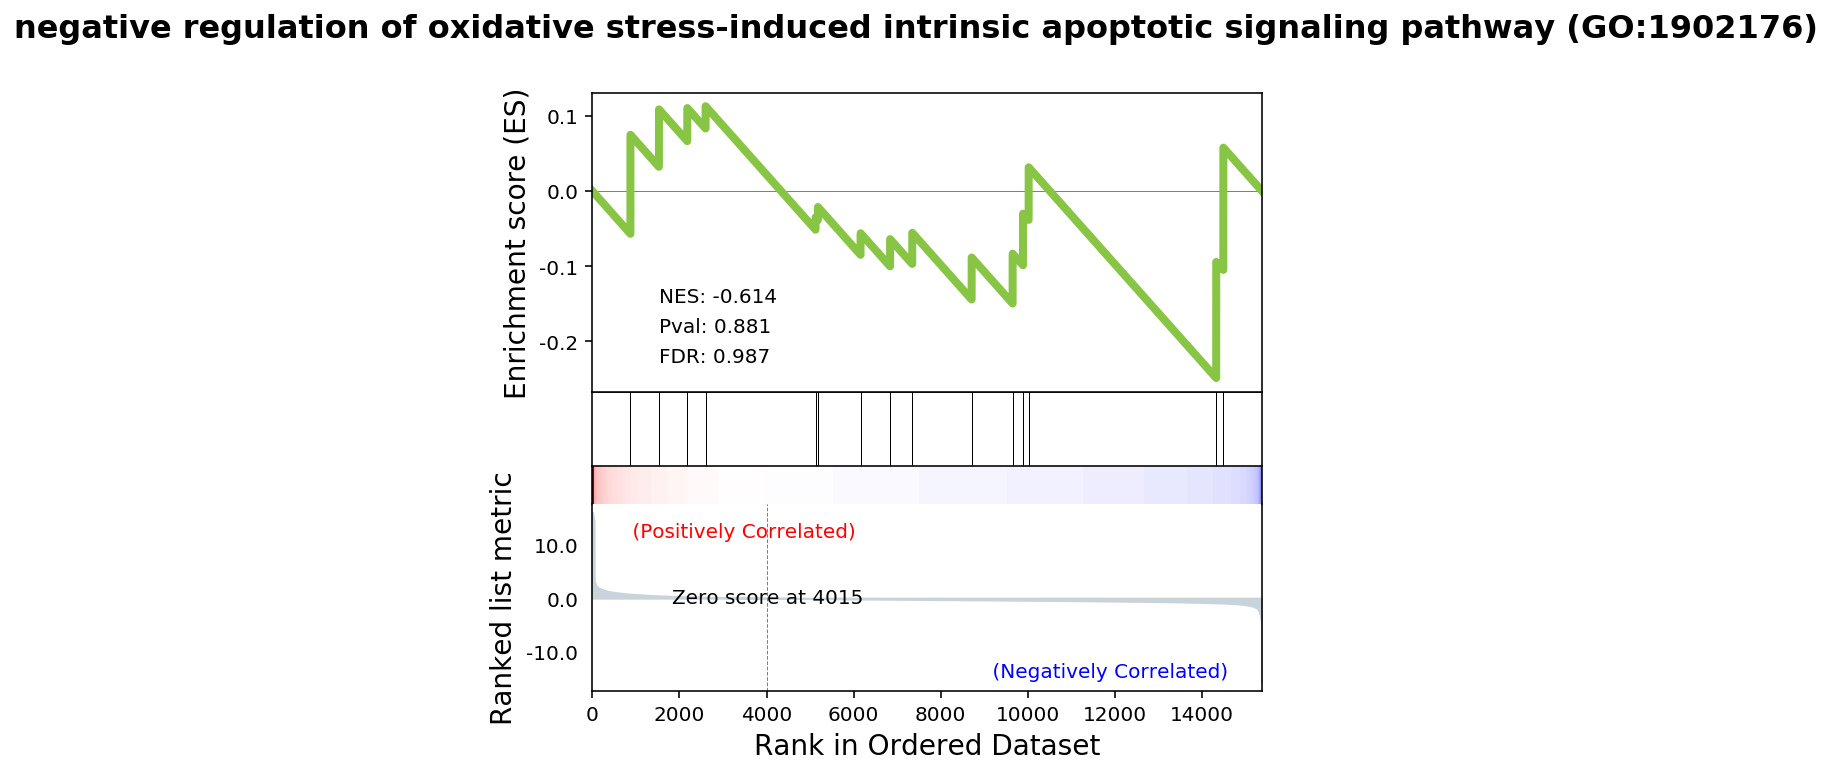

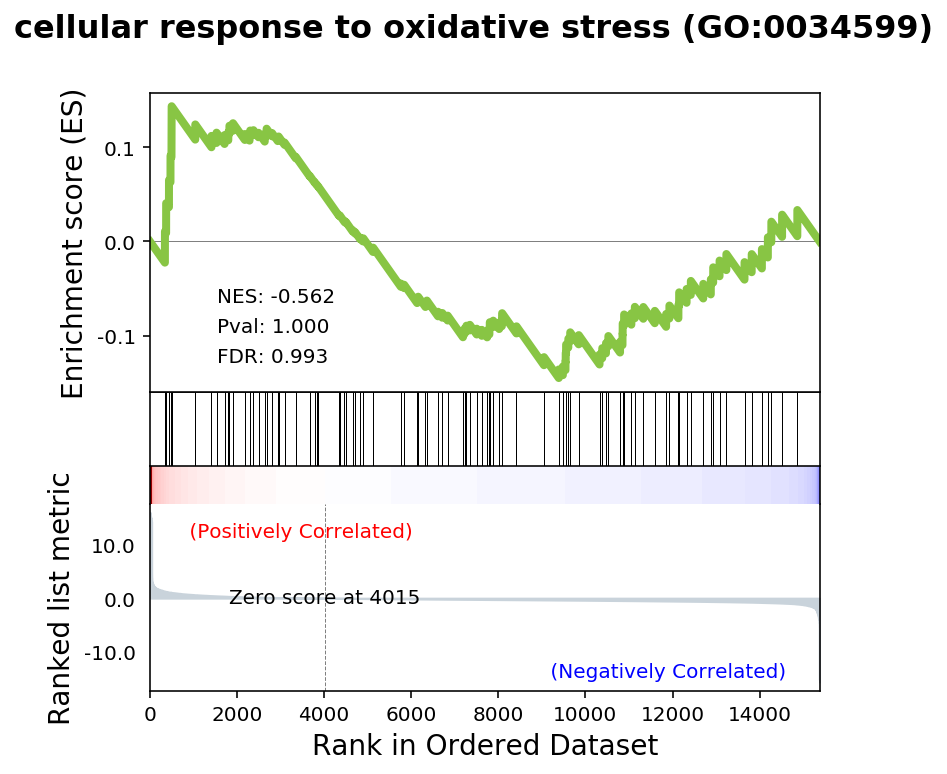

In [52]:
for x in terms[terms.str.contains('stress')]:
    gseaplot(gs_res.ranking, term=x, **gs_res.results[x])